In [1]:
import cv2 
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
def display(img, cmap='gray'):
    fig = plt.figure(figsize=(12,10))
    ax = fig.add_subplot(111)
    ax.imshow(img, cmap='gray')

In [4]:
sep_coins = cv2.imread('../DATA/pennies.jpg')

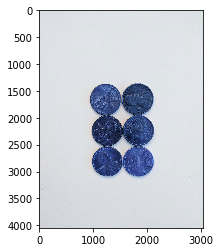

In [5]:
plt.imshow(sep_coins)

In [9]:
# Median Blur

In [11]:
sep_blur = cv2.medianBlur(sep_coins, 25)

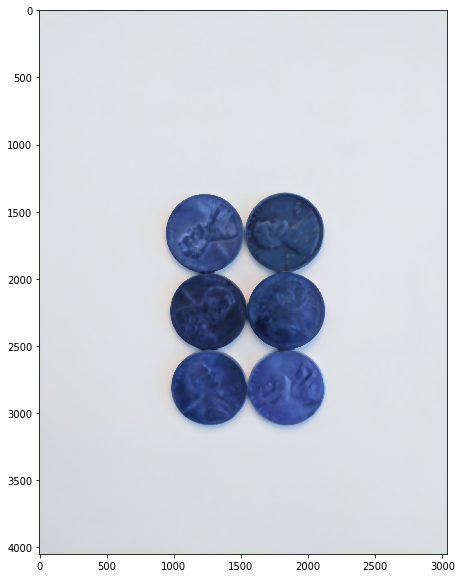

In [12]:
display(sep_blur)

In [13]:
# Grayscale

In [15]:
gray_sep_coins = cv2.cvtColor(sep_blur, cv2.COLOR_BGR2GRAY)

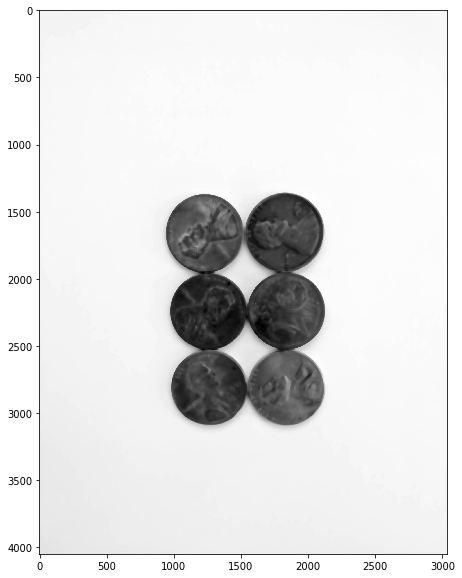

In [16]:
display(gray_sep_coins)

In [17]:
# Binary Threshold

In [19]:
ret, sep_thresh = cv2.threshold(gray_sep_coins, 160, 255, cv2.THRESH_BINARY_INV)

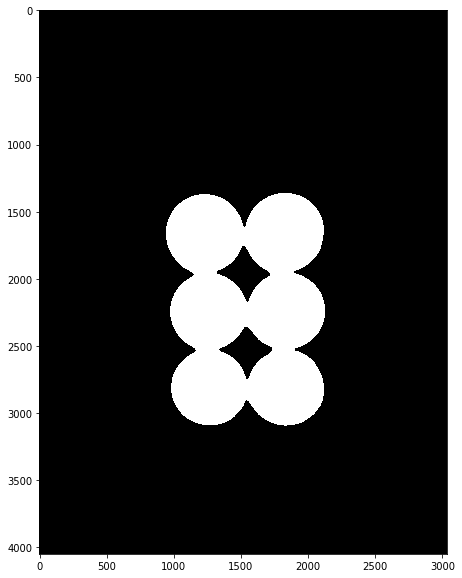

In [21]:
display(sep_thresh)

In [22]:
# Find Contours

In [24]:
image, contours, hierarchy = cv2.findContours(sep_thresh.copy(), cv2.RETR_CCOMP, cv2.CHAIN_APPROX_SIMPLE)

In [26]:
for i in range(len(contours)):
    if hierarchy[0][i][3] == -1:
        cv2.drawContours(sep_coins, contours, i, (255,0,0), 10)

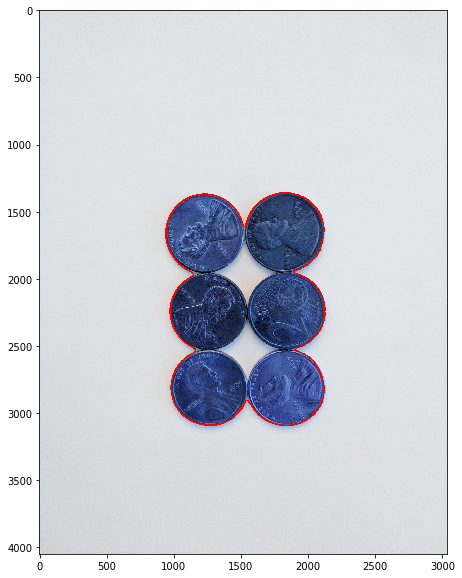

In [27]:
display(sep_coins)

In [28]:
# WATERSHED ALGORITHM

In [29]:
img = cv2.imread('../DATA/pennies.jpg')

In [30]:
img = cv2.medianBlur(img, 35)

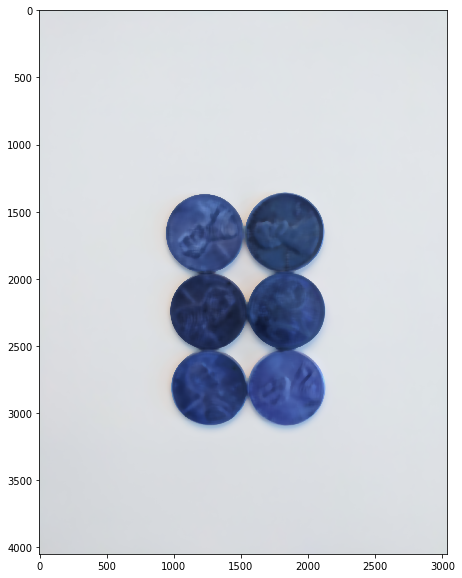

In [31]:
display(img)

In [32]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

In [35]:
# Otsu's Method
ret, thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)

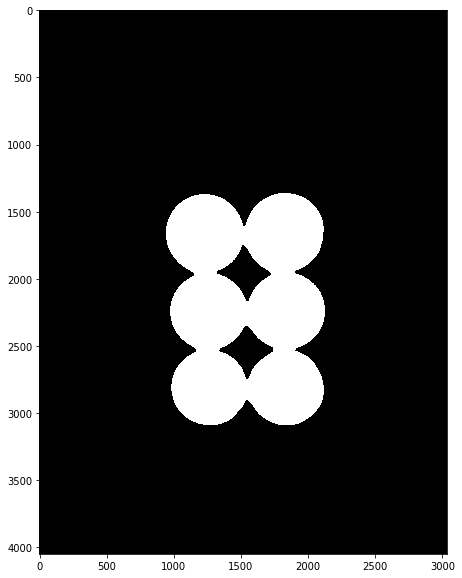

In [36]:
display(thresh)

In [37]:
# NOISE REMOVAL (OPTIONAL)    

In [39]:
kernel = np.ones((3,3), np.uint8)

In [40]:
opening = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, kernel, iterations=2)

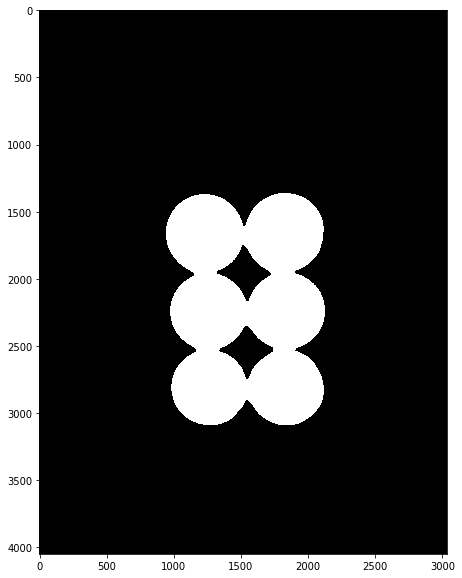

In [41]:
display(opening)

In [51]:
sure_bg = cv2.dilate(opening, kernel, iterations=3)

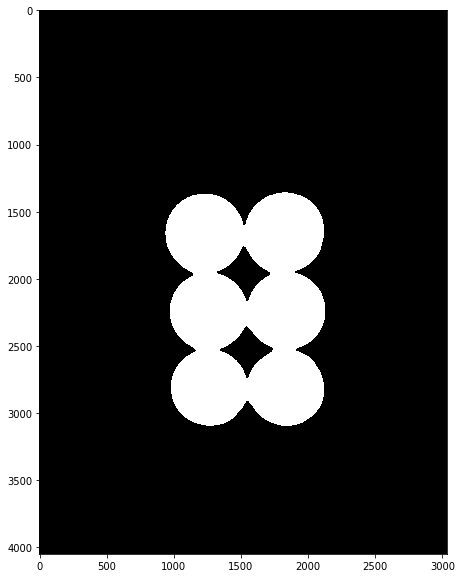

In [52]:
display(sure_bg, cmap='gray')

In [ ]:
# DISTANCE TRANSFORM

In [43]:
dist_transform = cv2.distanceTransform(opening, cv2.DIST_L2, 5)

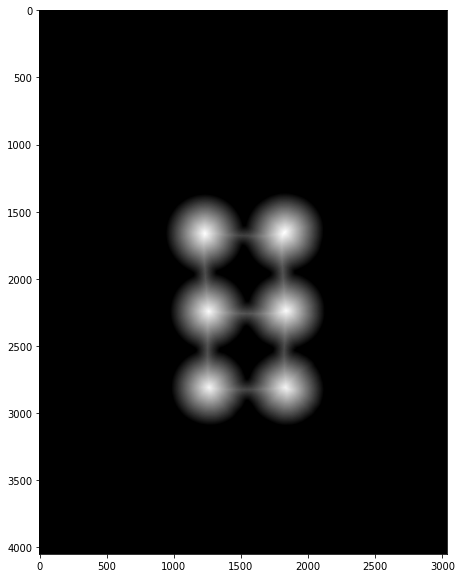

In [44]:
display(dist_transform)

In [45]:
ret, sure_fg = cv2.threshold(dist_transform, 0.7*dist_transform.max(), 255,0)

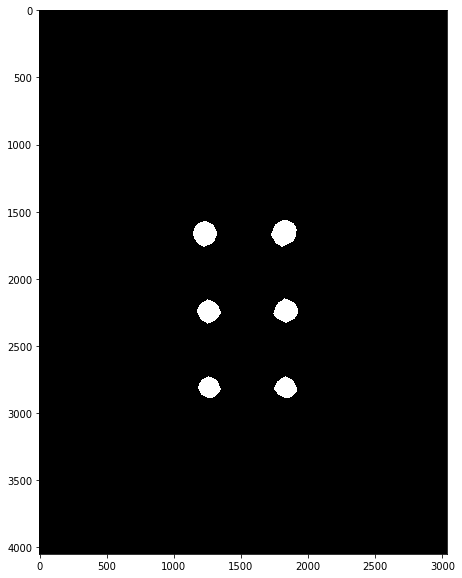

In [46]:
display(sure_fg)

In [47]:
sure_fg = np.uint8(sure_fg)

In [53]:
unknown = cv2.subtract(sure_bg, sure_fg)

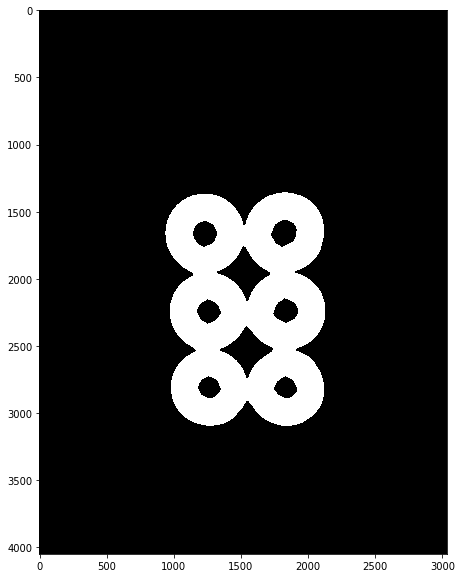

In [54]:
display(unknown)

In [55]:
ret, markers = cv2.connectedComponents(sure_fg)

In [56]:
markers = markers + 1

In [57]:
markers[unknown==255] = 0

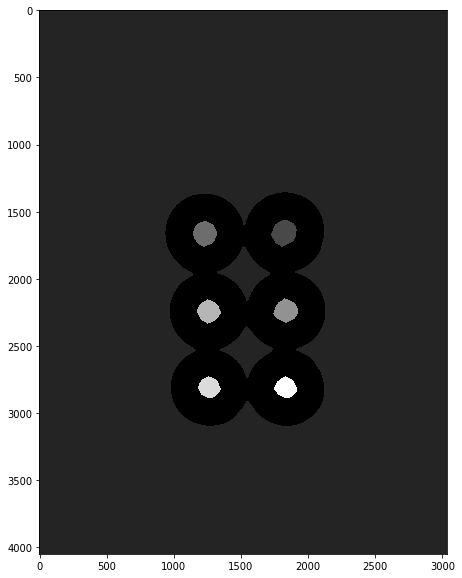

In [58]:
display(markers)

In [59]:
markers = cv2.watershed(img, markers)

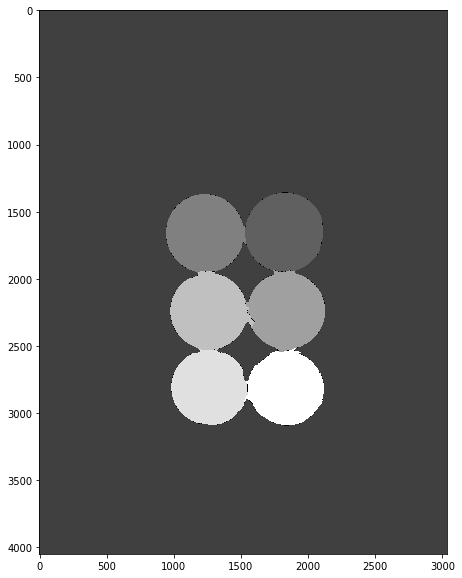

In [60]:
display(markers)

In [63]:
image, contours, hierarchy = cv2.findContours(markers.copy(), cv2.RETR_CCOMP, cv2.CHAIN_APPROX_SIMPLE)

In [64]:
for i in range(len(contours)):
    if hierarchy[0][i][3] == -1:
        cv2.drawContours(sep_coins, contours, i, (255,0,0), 10)

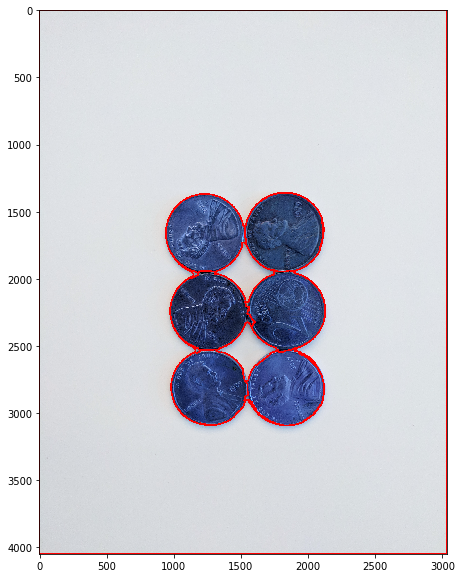

In [65]:
display(sep_coins)